# Data Preprocess (MNIST)

In [3]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf

%matplotlib inline

# 데이터 불러오기
TensorFlow에서 제공해주는 데이터셋(MNIST) 예제 불러오기 

In [4]:
from tensorflow.keras import datasets

- 데이터 shape 확인하기

In [5]:
mnist=datasets.mnist

In [6]:
(train_x,train_y),(test_x,test_y)=mnist .load_data()

In [8]:
(train_x.shape, train_y.shape)

((60000, 28, 28), (60000,))

# Image Dataset 들여다보기

불러온 데이터셋에서 이미지 데이터 하나만 뽑아서 시각화까지 확인

- 데이터 하나만 뽑기

In [11]:
image=train_x[0]
image.shape #뒤에 채널 3이 없다는 것은 gray scale이라는 것 원래는 gray라도 1이 있어야 함

(28, 28)

- 시각화해서 확인

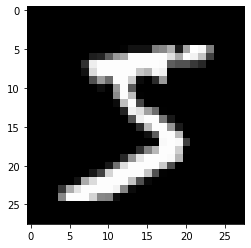

In [10]:
plt.imshow(image,'gray')
plt.show()

# Channel 관련

[Batch Size, Height, Width, Channel]  
GrayScale이면 1, RGB이면 3으로 만들어줘야함

- 다시 shape로 데이터 확인

In [12]:
train_x.shape

(60000, 28, 28)

- 데이터 차원수 늘리기 (numpy)

In [13]:
expanded_data=np.expand_dims(train_x,-1) #-1은 맨 뒤에다가 차원수를 늘리겠다는 말 , 0은 맨 앞에 차원을 늘리겠다
expanded_data.shape

(60000, 28, 28, 1)

- TensorFlow 패키지 불러와 데이터 차원수 늘리기 (tensorflow)

In [15]:
new_train_x=tf.expand_dims(train_x,-1) #tensoflow에도 expand_dims가 있다
new_train_x.shape

TensorShape([Dimension(60000), Dimension(28), Dimension(28), Dimension(1)])

- TensorFlow 공홈에서 가져온 방법 tf.newaxis

In [17]:
train_x.shape

(60000, 28, 28)

In [20]:
# 이 방법 추천 (깔끔)
train_x[...,tf.newaxis].shape

(60000, 28, 28, 1)

In [19]:
reshaped=train_x.reshape([60000,28,28,1])
reshaped.shape

(60000, 28, 28, 1)

*주의 사항  
matplotlib로 이미지 시각화 할 때는 gray scale의 이미지는 3번쨰 dimension이 없으므로,  
2개의 dimension으로 gray scale로 차원 조절해서 넣어줘야함

- new_train_x[0] -> new_train_x[0, :, :, 0]

In [22]:
new_train_x=train_x[...,tf.newaxis]
new_train_x.shape

(60000, 28, 28, 1)

(28, 28, 1)


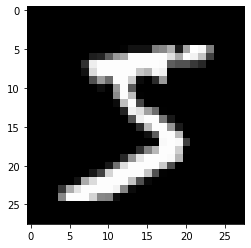

In [24]:
disp=new_train_x[0]
print(disp.shape)
plt.imshow(disp,'gray')
plt.show() #error남. matplot에서는 시각화할때는 뒤에 1이 있으면 안된다 되는 이유는 버전 달라서 그런가

In [26]:
np.squeeze(new_train_x[0]).shape

(28, 28)

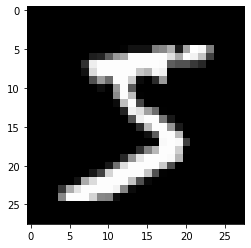

In [28]:
disp=np.squeeze(new_train_x[0])
plt.imshow(disp,'gray')
plt.show()

- 다시 시각화

# Label Dataset 들여다보기  

Label 하나를 열어서 Image와 비교하여 제대로 들어갔는지. 어떤 식으로 저장 되어있는지 확인

- label 하나만 뽑아보기

In [29]:
train_y.shape

(60000,)

In [32]:
train_y[3]

1

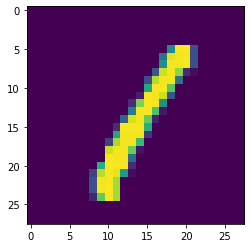

In [33]:
plt.imshow(train_x[3])
plt.show()

- Label 시각화 

# OneHot Encoding



컴퓨터가 이해할 수 있는 형태로 변환해서 Label을 주도록 함

In [0]:
# 5
[0,0,0,0,0,1,0,0,0,0]

# 9
[0,0,0,0,0,0,0,0,0,1]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 1]

- tensorflow.keras.utils.to_categorical

In [35]:
from tensorflow.keras.utils import to_categorical #onehot encoding해주는 라이브러리

- 1을 예시로 one hot encoding

In [38]:
print(to_categorical(0,10)) #y, 전체 클래스 갯수
print(to_categorical(3,20))

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


- label 확인해서 to_categorical 사용

In [39]:
label=train_y[0]
label

5

In [40]:
label_onehot=to_categorical(label,num_classes=10)
label_onehot

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

- onehot encoding으로 바꾼 것과 이미지 확인

In [0]:
plt.title(label_onehot)
plt.imshow(train_x[0],'gray')